# Load libraries and data

In [14]:
import pandas as pd
import numpy as np

from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [15]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=4) 


X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

model_features = set(X_train.select_dtypes(np.number).columns) - set(['year','month','day', 'day_of_week'])

# Analyze results of final random forest model

In [37]:
rf = load('rf_final.joblib')
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features=50, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
import shap

# load JavaScript visualization library
shap.initjs()

# generate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train[model_features])

#### SHAP summary plot

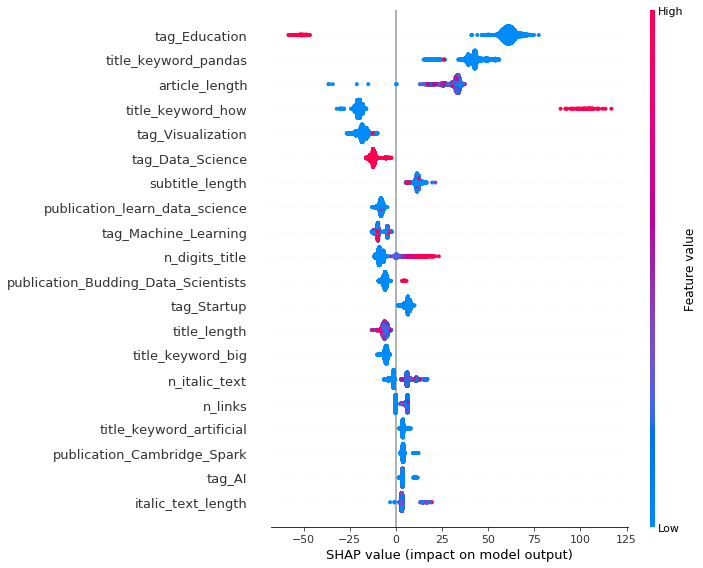

In [42]:
shap.summary_plot(shap_values, X_train[model_features])

#### Overall feature importances

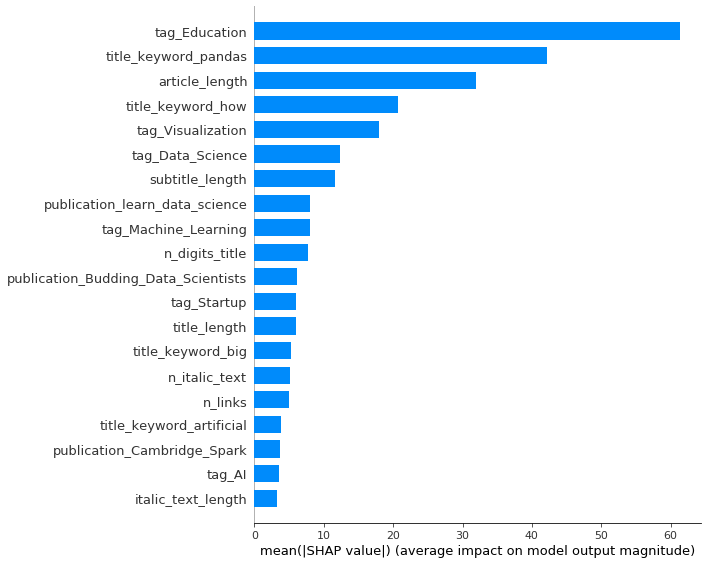

In [21]:
shap.summary_plot(shap_values, X_train[model_features], plot_type="bar")

#### How different feature values affect an individual prediction

In [35]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train[model_features].iloc[0,:])

Problem is that a lot of signal is lost because we don't look into keywords and actual content of the article. There's only so much we can extract from article length, etc.